In [53]:
import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns 

from PIL import Image

import os

from  tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import MobileNet 

from tensorflow.keras.layers import GlobalAveragePooling2D , Dropout , Dense 

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import Recall ,Precision



In [10]:
train_path= r'C:\Users\mwael\OneDrive\Desktop\after_cource\projects\hand_gesture\hand_gesture_data\Train'
test_path= r'C:\Users\mwael\OneDrive\Desktop\after_cource\projects\hand_gesture\hand_gesture_data\Test'

In [13]:
labels=os.listdir(train_path)
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


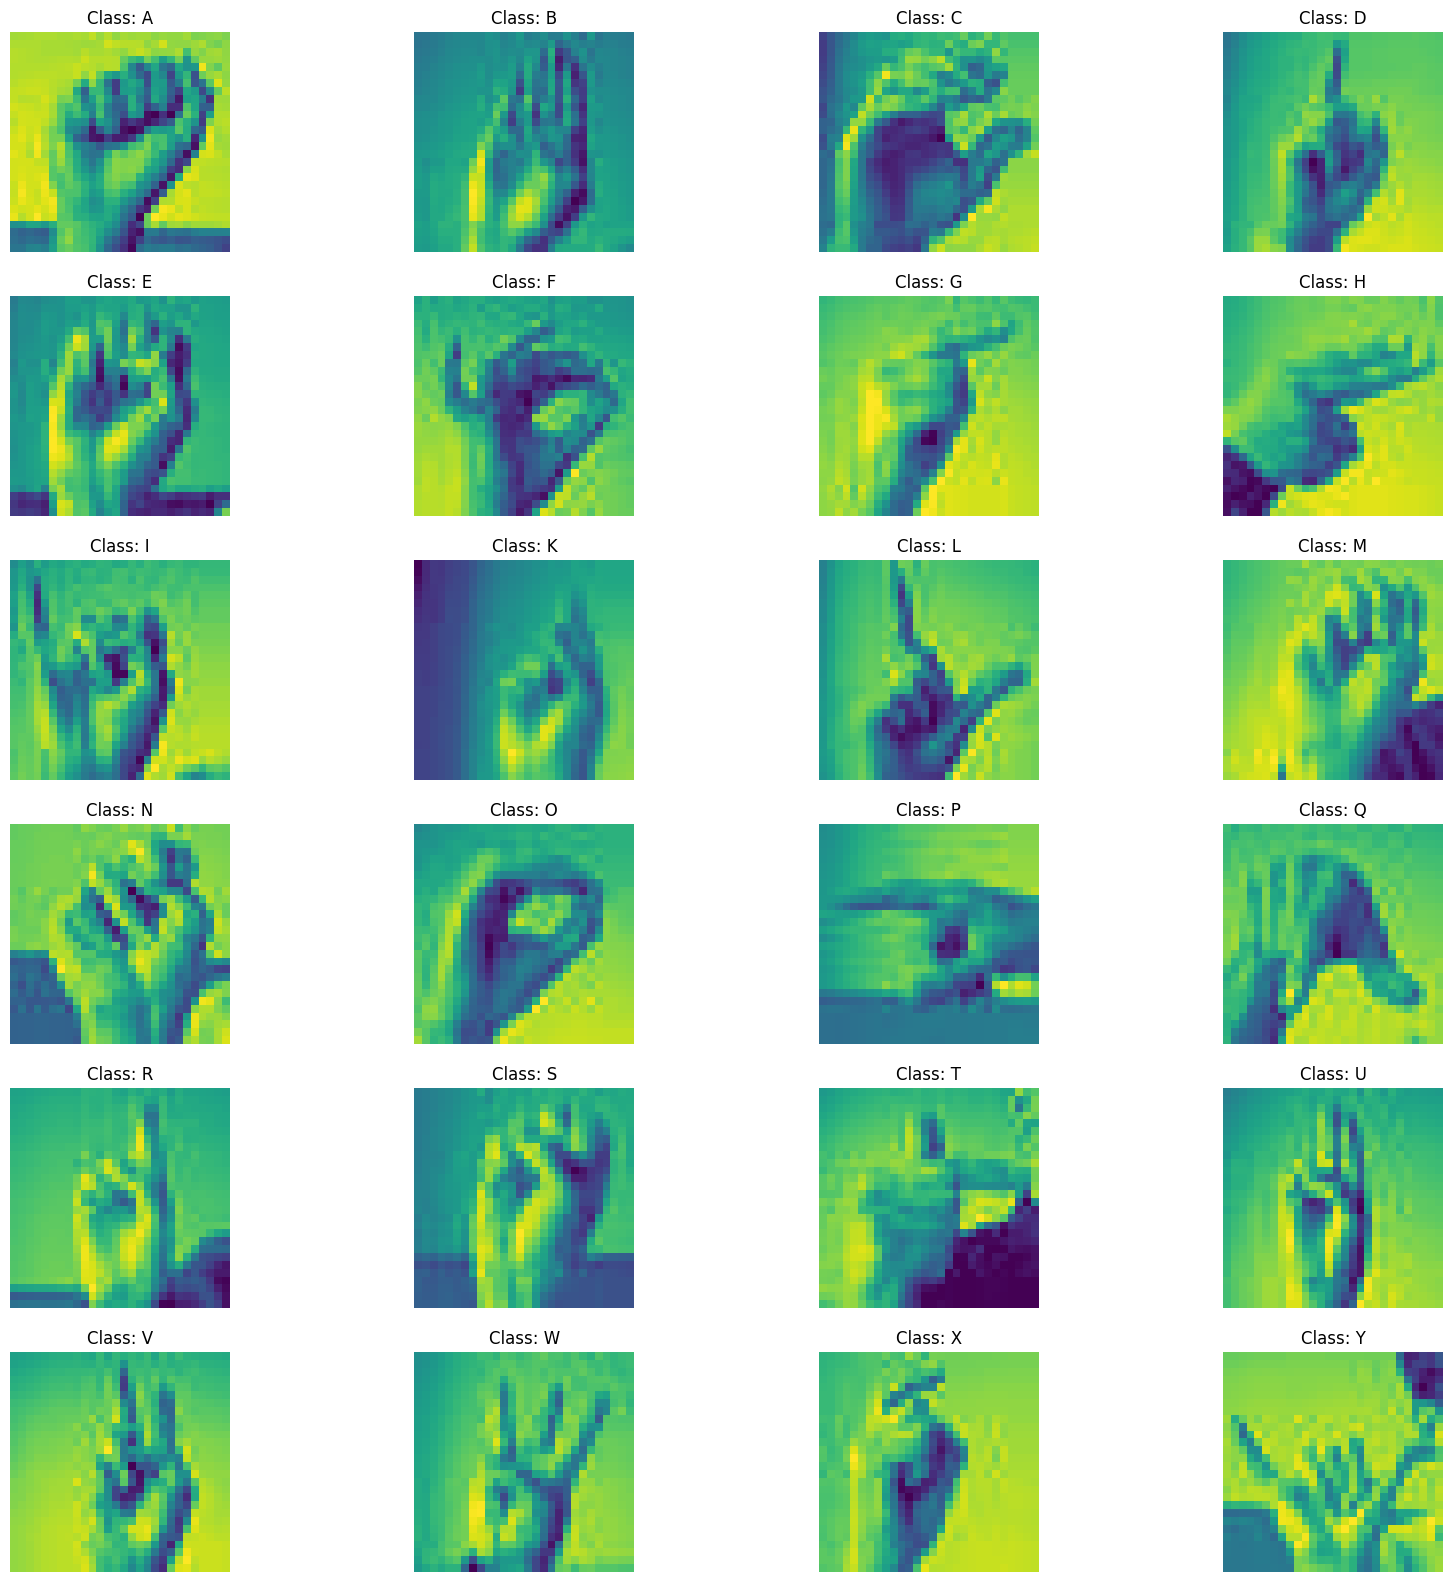

In [39]:
n=1

plt.figure(figsize=(20,20))     

for i in labels:


    class_folder = os.path.join(train_path, i) 

    image_name = os.listdir(class_folder)[0]  

    image_path = os.path.join(class_folder, image_name)

    image = Image.open(image_path)

    plt.subplot(6,4,n)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Class: {i}")
    n+=1

plt.show()

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    shear_range=0.2,       
    zoom_range=0.2, 
    horizontal_flip=True,
    rotation_range=30,       
    width_shift_range=0.2, 
    height_shift_range=0.2,
    validation_split=0.2       
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                    train_path,
                    target_size=(224,224),
                    batch_size=32,
                    class_mode='categorical',
                    subset='training'
                    )

####
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


####
test_generator=test_datagen.flow_from_directory(

                    test_path,
                    target_size=(224,224),
                    batch_size=32,
                    class_mode='categorical',
                    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [47]:
mobile_net=Sequential()
mobile_net.add(MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3)))

mobile_net.add(Dropout(0.5))

mobile_net.add(GlobalAveragePooling2D())
mobile_net.add(Dense(units=train_generator.num_classes,activation='softmax'))

mobile_net.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │        24,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,253,464 (12.41 MB)

 Trainable params: 3,231,576 (12.33 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [57]:
mobile_net.compile(optimizer=Adam(),
                   loss='categorical_crossentropy',
                   metrics=[
                       Recall,
                       Precision,
                       ' accuracy '

                            ]
                    )


mobile_net.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │        24,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,253,464 (12.41 MB)

 Trainable params: 3,231,576 (12.33 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [59]:
mobile_net.fit(train_generator,
               epochs=10,
                validation_data=validation_generator,
                steps_per_epoch=train_generator.samples // train_generator.batch_size,
                validation_steps=validation_generator.samples // validation_generator.batch_size
                )


Epoch 1/10


c:\Users\mwael\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/686 ━━━━━━━━━━━━━━━━━━━━ 1:30:17 8s/step - accuracy: 0.1035 - loss: 3.8707 - precision: 0.5312 - recall: 0.0254       

KeyboardInterrupt: 

In [ ]:
test_loss,test_acc=mobile_net.evaluate(test_generator)
print(f"loss: {test_loss} -- accuracy: {test_acc}")